<a href="https://colab.research.google.com/github/ParkJeongUng/Ung.github.io/blob/master/_notebooks/2022-02-20-%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%83%9D%EC%A1%B4%EC%9E%90_%EC%98%88%EC%B8%A1_(5%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 예측 (5주차)

In [ ]:
# 라이브러리 임포트
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#plt.rc('font', family='NanumGothic') 
plt.rcParams.update({'font.size' : 11})
plt.rc('figure', facecolor = 'eaeaf2')

import seaborn as sns
def show_countplot(column):
    plt.figure(figsize=(12,4))
    sns.countplot(data=train, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(train[column], bins=50)
    plt.show()

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## 데이터 불러오기
* PassengerID : 탑승객 고유 아이디
* Pclass : 등실의 등급
* Name : 이름
* Sex : 성별
* Age : 나이
* Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
* Parch : 함께 탐승한 부모, 자식의 수
* Ticket :티켓 번호
* Fare : 티켓의 요금
* Cabin : 객실번호
* Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)
* Survival : 탑승객 생존 유무 (0: 사망, 1: 생존) // 타겟 값

In [ ]:
path = '/content/drive/MyDrive/mydata/titanic/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')
submission = pd.read_csv(path + 'submission.csv')

## 데이터 살펴보기


### 데이터 확인

In [ ]:
# 데이터 확인
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


### train, test 크기 확인

In [ ]:
# train, test 크기 확인
train.shape[0], test.shape[0]

(891, 418)

### 타겟 값 이상치 확인

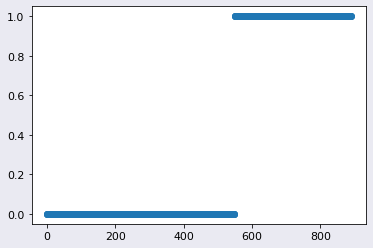

In [ ]:
plt.scatter(range(train.shape[0]), train.Survived.sort_values())

# 타겟 값 이상치 없음

### 결측치 확인
1. Age 결측치 
  * 재난상황 구조 순서를 근거로 접근해보자 노약자 어린이는 먼저 구조하지 않을까?
2. test 데이터의 Fare 컬럼에 결측치가 하나 존재한다 
  * test 데이터 row를 삭제하는게 맞는걸까?

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# train 데이터 결측치 확인
train.isnull().sum()

# Age 변수 결측치 -> 재난상황 구조 순서를 근거로 접근해볼까?
# Cabin(객실번호) 변수 결측치 -> 층 수는 중요할 것 같은데 결측치가 너무 많다 삭제하자

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# test 데이터 결측치 확인
test.isnull().sum()

# train 데이터와 마찬가지로 Age, Cabin 변수에 결측치가 있다
# Fare 에만 결측치가 하나 존재하는데 test 데이터 row를 삭제하는게 맞는걸까?

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 재난상황 구조 순서를 근거로 접근해보자 노약자 어린이는 먼저 구조하지 않을까?
* 재난상황에서는 어린이, 노약자, 여성, 남성 순으로 구조
* 타이타닉 호 선장은 1등실 부터 3등실 순서로 여자와 어린이들 먼저 구조하라고 명령했다

Text(0, 0.5, 'Count')

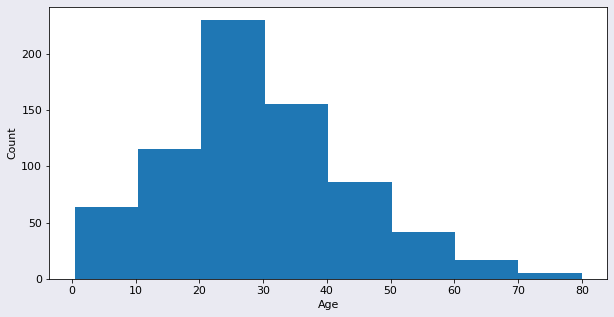

In [ ]:
# 연령대별 히스토그램
plt.figure(figsize = (10, 5))
plt.hist(train.Age, bins = 8)
plt.xlabel('Age')
plt.ylabel('Count')

# 60 ~ 80 은 하나로 묶어도 좋을것 같다

Text(0, 0.5, 'Count')

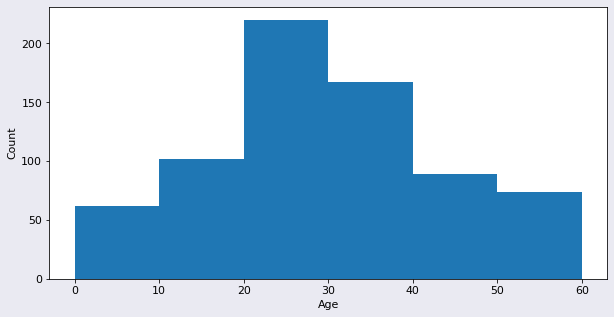

In [ ]:
# 10대 20대 ... 으로 묶기
# 0 ~ 10 세는 0 으로 지정
def age_categorize(age):
  age = (age // 10) * 10
  return age

# 60 ~ 80 세는 60대로 묶기
train.loc[(train.Age >= 60), 'Age'] = 60

train.Age = train.Age.apply(age_categorize).astype('category')
plt.figure(figsize = (10, 5))
plt.hist(train.Age, bins = 6)
plt.xlabel('Age')
plt.ylabel('Count')

Text(0.5, 1.0, 'Age(sex) - Survived')

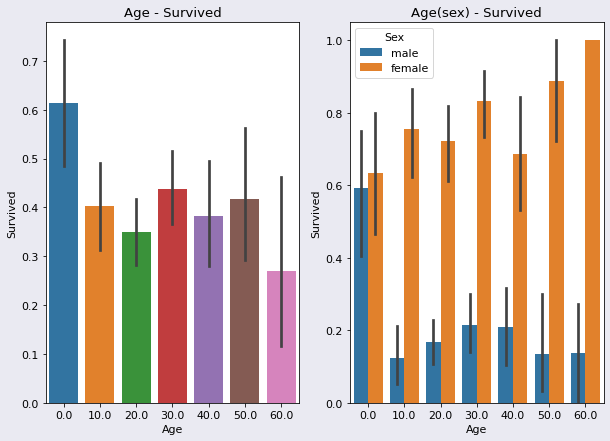

In [ ]:
# 연령기준 생존률
# 연령과 성별 기준 생존률
fig, axs = plt.subplots(1, 2, figsize = (10, 7))
sns.barplot(data = train, x= 'Age', y = 'Survived', ax = axs[0])
axs[0].set_title("Age - Survived")

sns.barplot(data = train, x = 'Age', y = 'Survived', hue = 'Sex', ax = axs[1])
axs[1].set_title("Age(sex) - Survived")

# 구조순서가 어린이와 여자를 먼저 구조하라고 했는데 실제 데이터와 일치하는 걸 확인할 수 있다
# 나이와 성별 피쳐는 중요할 것으로 보인다 삭제하지말고 알고리즘으로 예측해서 만들어보자

##### Fare & Pclass // 객실요금을 가지고 나이를 예측해보자

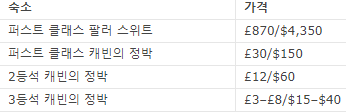

In [ ]:
# 티켓 가격이 소수점이니 반올림 해주자
train.Fare = round(train.Fare)

In [ ]:
# 연령대별 티켓 가격의 중간값을 구해보자
# 1등석
first = train.loc[train.Pclass == 1]
print(first.groupby('Age').Fare.median())
print(first.groupby('Age').Fare.std())

# 나이 피쳐는 0세 ~ 10세 사이 변수가 중요한 것 같고 나머지는 어떻게 들어가든 사망률이 높다
# 1등석 기준 Fare 110 이상 낸 사람들은 0세 ~ 10세로 분류하고 나머지는 다른나이로
# 0세 ~ 10세 나이인 아이가 혼자 타이타닉에 탑승했을리는 없다 // Parch > 0
first.query('Fare >= 110 & Parch > 0 ')

# Age 결측치 없다

Age
0.0     151.55000
10.0     99.98960
20.0     77.00835
30.0     73.78750
40.0     52.00000
50.0     61.37920
60.0     34.65420
Name: Fare, dtype: float64
Age
0.0      40.236522
10.0     76.537281
20.0     73.777834
30.0    114.523169
40.0     53.552784
50.0     51.137638
60.0     56.684528
Name: Fare, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,10.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,20.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,20.0,0,1,PC 17558,247.5208,B58 B60,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,50.0,0,1,PC 17582,153.4625,C125,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,0.0,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.0,1,2,113781,151.5500,C22 C26,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,10.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,30.0,0,2,36928,164.8667,C7,S
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E34,C


In [ ]:
# 같은방법으로 2등석
second = train.loc[train.Pclass == 2]
print(second.groupby('Age').Fare.median())
print(second.groupby('Age').Fare.std())

# Fare 19 기준
second.query('Fare >= 19 & Parch > 0')

# Age 결측치 없다

Age
0.0     26.0
10.0    13.0
20.0    14.0
30.0    13.0
40.0    23.0
50.0    14.0
60.0    10.0
Name: Fare, dtype: float64
Age
0.0      7.980675
10.0    15.614745
20.0    16.447325
30.0    10.882268
40.0    12.816579
50.0     6.047432
60.0    14.500000
Name: Fare, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,0.0,1,2,SC/Paris 2123,42.0,NaN,C
58,59,1,2,"West, Miss. Constance Mirium",female,0.0,1,2,C.A. 34651,28.0,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.0,0,2,248738,29.0,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,30.0,0,1,231919,23.0,NaN,S
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,10.0,1,1,C.A. 33112,37.0,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,30.0,0,2,230080,26.0,F2,S
183,184,1,2,"Becker, Master. Richard F",male,0.0,2,1,230136,39.0,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,0.0,1,1,230080,26.0,F2,S
237,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,0.0,0,2,C.A. 31921,26.0,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0,NaN,S


In [ ]:
# 같은방법으로 3등석
third = train.loc[train.Pclass == 3]
print(third.groupby('Age').Fare.median())
print(third.groupby('Age').Fare.std())

# Fare 10 기준
third.query('Fare >= 10 & Parch > 0')

# Age 결측치 존재
# 결측치를 전부 0으로 바꿔준다
third_index = third.query('Fare >= 10 & Parch > 0').index
third = train.iloc[third_index]
third_null_index = third[third.Age.isnull()].index
train.at[third_null_index, 'Age'] = 0

Age
0.0     21.5500
10.0     8.0500
20.0     7.8958
30.0     8.0500
40.0     8.0500
50.0     7.9000
60.0     7.7500
Name: Fare, dtype: float64
Age
0.0     10.042806
10.0    10.749635
20.0     7.137672
30.0    10.190606
40.0    10.410558
50.0     0.444872
60.0     1.187454
Name: Fare, dtype: float64


In [ ]:
# 나머지 나이 결측치는 전체나이 평균으로 넣자
train.Age.mean()

29.69911764705882

In [ ]:
# 나머지 결측치는 29세 --> 20대로 넣자
train.Age.fillna(20, inplace = True)

#### test 데이터 Fare 결측치
* test 데이터 row를 삭제하는게 맞는걸까?
* test 데이터는 제출을 위해서 사용되니 제거할 수 없다
* 적정값을 넣어주자

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
print(test[test.Fare.isnull()])

# 3등석 60대 평균 티켓가격 7$
test.at[152, 'Fare'] = 7

     PassengerId  Pclass                Name   Sex  ...  Ticket  Fare  Cabin Embarked
152         1044       3  Storey, Mr. Thomas  male  ...    3701   NaN    NaN        S

[1 rows x 11 columns]


In [ ]:
test.isnull().sum()

# 채우기 끝

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### 수치형 범주형 나눠서 관찰하기

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 수치형 데이터
numeric_features = train.columns[(train.dtypes == int) | (train.dtypes == float)]

# 범주형 데이터
categorical_features = train.columns[train.dtypes == 'O']

print("수치형 데이터 컬럼 : {}".format(list(numeric_features)))
print("범주형 데이터 컬럼 : {}".format(list(categorical_features)))

수치형 데이터 컬럼 : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']
범주형 데이터 컬럼 : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


#### 수치형 데이터
* 수치형 데이터 컬럼 : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

* Pclass : 등실의 등급
* Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
* Parch : 함께 탐승한 부모, 자식의 수
* Fare : 티켓의 요금


In [ ]:
# Sibsp 와 Parch 더해서 Family column 생성
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp', 'Parch'], axis = 1)

In [ ]:
# 관찰한 numeric_features 만 놔두고 제거
numeric_features = list(numeric_features)
del numeric_features[0:2]
del numeric_features[1]
del numeric_features[3]
numeric_features

['Pclass', 'SibSp', 'Parch', 'Family']

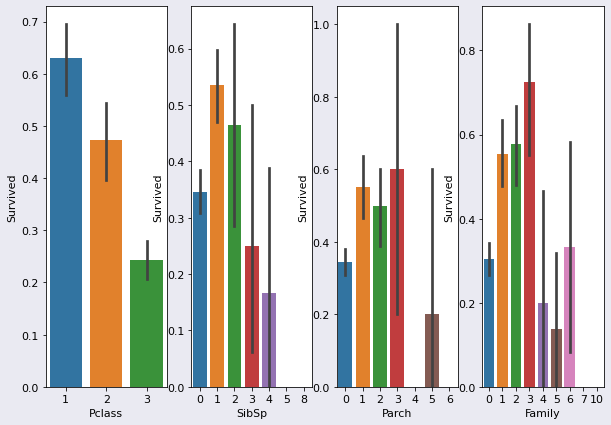

In [ ]:
# 2 * 2 표
fig, axs = plt.subplots(1, 4, figsize = (10, 7))

# barplot 함수
def barplot(x, axis):
  sns.barplot(data = train, x = x, y = 'Survived', ax = axs[axis])


a = 0
for i in numeric_features:
  barplot(i, a)
  a += 1

# 확실히 높은등급의 좌석일수록 좋다 비싼값 한다
# 가족이 많을수록 살기 힘들어보인다 

##### Fare // Pclass

([<matplotlib.axis.XTick at 0x7fb9e1bd0bd0>,
 <a list of 3 Text major ticklabel objects>)

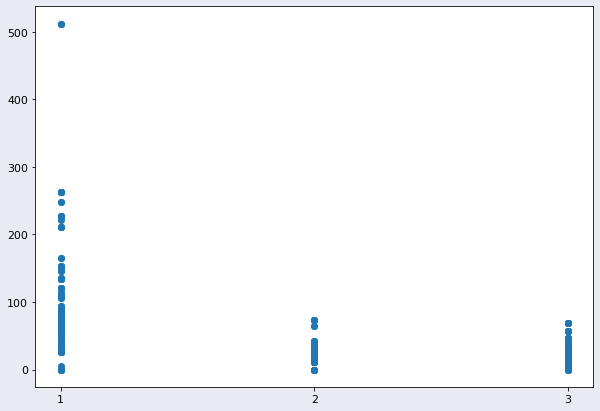

In [ ]:
# 좌석등급별 티켓 가격
plt.figure(figsize = (10, 7))
plt.scatter(train.Pclass, train.Fare)
plt.xticks([1, 2, 3])

# 가격이 쫌 이상하다 할인행사인가?

##### Fare // Age

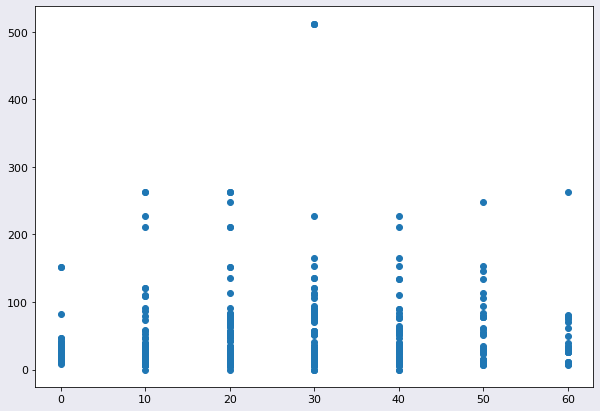

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(train.Age, train.Fare)

Text(0.5, 1.0, 'Sex')

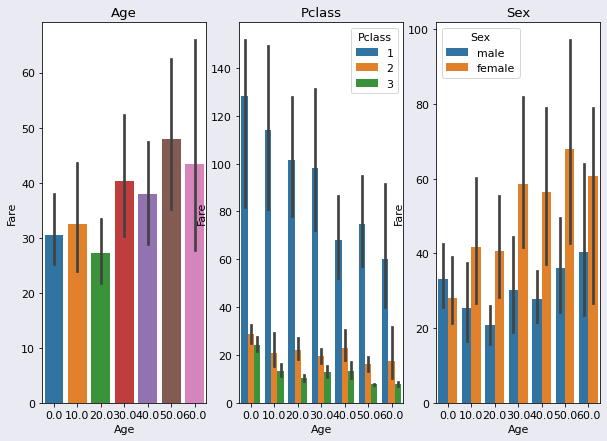

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (10, 7))
sns.barplot(data = train, x = 'Age', y = 'Fare', ax = axs[0])
axs[0].set_title('Age')
sns.barplot(data = train, x = 'Age', y = 'Fare', hue = 'Pclass', ax = axs[1])
axs[1].set_title('Pclass')
sns.barplot(data = train, x = 'Age', y = 'Fare', hue = 'Sex', ax = axs[2])
axs[2].set_title('Sex')

# 어리다고 할인해주고 그런건 없어보인다 프로모션

#### 범주형 데이터
* 범주형 데이터 컬럼 : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
* Sex : 성별
* Cabin : 객실번호
* Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

##### 객실번호 생존률

In [ ]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
train.fillna('N', inplace = True)

In [ ]:
# 알파벳 분류 해서 생존률 확인해보기
A_index = train.query('Cabin.str.contains("A")',engine = 'python').index
B_index = train.query('Cabin.str.contains("B")',engine = 'python').index
C_index = train.query('Cabin.str.contains("C")',engine = 'python').index
D_index = train.query('Cabin.str.contains("D")',engine = 'python').index
E_index = train.query('Cabin.str.contains("E")',engine = 'python').index
F_index = train.query('Cabin.str.contains("F")',engine = 'python').index

In [ ]:
train.at[A_index, 'Cabin'] = 'A'
train.at[B_index, 'Cabin'] = 'B'
train.at[C_index, 'Cabin'] = 'C'
train.at[D_index, 'Cabin'] = 'D'
train.at[E_index, 'Cabin'] = 'E'
train.at[F_index, 'Cabin'] = 'F'

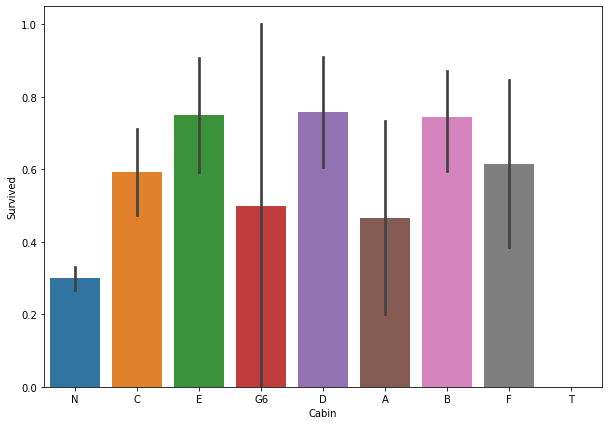

In [ ]:
plt.figure(figsize = (10, 7))
sns.barplot(data = train, x = train.Cabin, y = train.Survived)

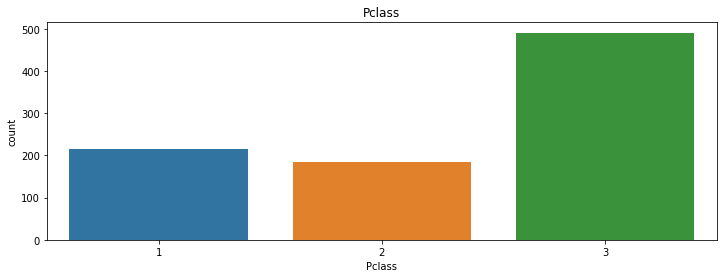

In [ ]:
show_countplot('Pclass')

In [ ]:
train.query('Cabin.str.contains("C")',engine = 'python')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S
55,56,1,1,"Woolner, Mr. Hugh",male,N,0,0,19947,35.5000,C,S
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C,S


In [ ]:
train.query('Cabin.str.contains("E")',engine = 'python')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,N,0,1,113505,55.0000,E,S
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E,S
303,304,1,2,"Keane, Miss. Nora A",female,N,0,0,226593,12.3500,E,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E,C
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,40.0,1,1,16966,134.5000,E,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E,C
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E,S


##### 성별 생존률

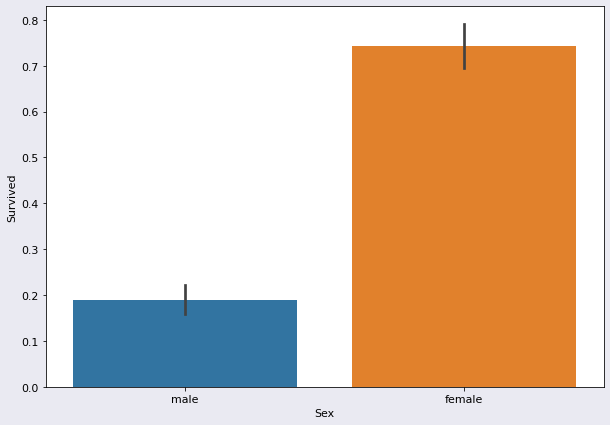

In [ ]:
plt.figure(figsize = (10, 7))
sns.barplot(data = train, x =train.Sex, y = train.Survived)

##### 타이타닉 항로는 S -> C -> Q

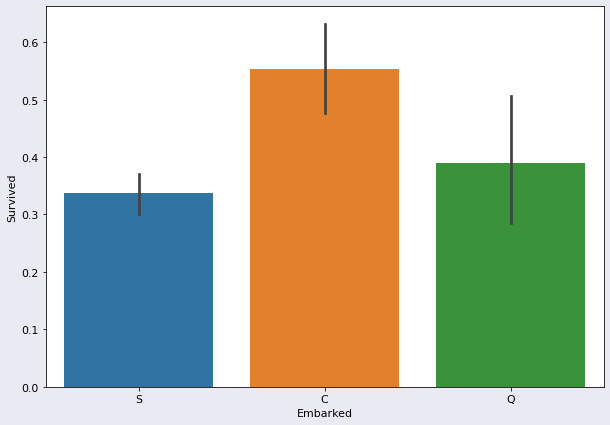

In [ ]:
plt.figure(figsize = (10, 7))
sns.barplot(data = train, x =train.Embarked, y = train.Survived)